<a href="https://www.kaggle.com/code/avtnshm/bank-marketing-basics?scriptVersionId=168456571" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-marketing/balanced_bank.csv
/kaggle/input/bank-marketing/processed_bank.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

balanced_data = pd.read_csv("/kaggle/input/bank-marketing/balanced_bank.csv")

processed_data = pd.read_csv("/kaggle/input/bank-marketing/processed_bank.csv")


In [4]:
print(balanced_data.head())
processed_data.head()

   Unnamed: 0  age         job  marital            education default housing  \
0       34579   35      admin.   single    university.degree      no     yes   
1         446   42  technician  married  professional.course      no      no   
2       20173   36      admin.  married    university.degree      no      no   
3       18171   37      admin.  married          high.school      no     yes   
4       30128   31  management   single    university.degree      no     yes   

  loan    contact month  ... campaign  pdays  previous     poutcome  \
0   no   cellular   may  ...        1    999         1      failure   
1   no  telephone   may  ...        1    999         0  nonexistent   
2   no   cellular   aug  ...        2    999         0  nonexistent   
3  yes  telephone   jul  ...        2    999         0  nonexistent   
4   no   cellular   apr  ...        1    999         0  nonexistent   

   emp.var.rate cons.price.idx  cons.conf.idx  euribor3m  nr.employed    y  
0          -1.8

,Unnamed: 0,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,contacted_before
0,34579,-0.68711,-2.555677e-13,0.976408,-0.758550,-0.928102,-1.122929,-0.900202,-0.418322,0,...,0,0,0,1,0,0,1,0,0,0
1,446,-0.68711,-2.555677e-13,-0.452557,0.924213,0.806766,0.705671,0.998971,0.637509,1,...,0,0,0,0,1,0,0,1,0,0
2,20173,-0.13552,-2.555677e-13,-0.452557,1.098292,-0.059880,0.761649,1.056089,1.063747,1,...,0,0,1,0,0,0,0,1,0,0
3,18171,-0.13552,-2.555677e-13,-0.452557,1.098292,0.687012,-0.469858,1.055031,1.063747,1,...,0,0,0,0,0,1,0,1,0,0
4,30128,-0.68711,-2.555677e-13,-0.452557,-0.758550,-0.641321,-1.290862,-0.847844,-0.418322,0,...,0,0,0,1,0,0,0,1,0,0


In [5]:
"Missing values in Balanced Dataset:\n", balanced_data.isnull().sum()
"\nMissing values in Processed Dataset:\n", processed_data.isnull().sum()


('\nMissing values in Processed Dataset:\n',
 Unnamed: 0              0
 campaign                0
 pdays                   0
 previous                0
 emp.var.rate            0
                        ..
 day_of_week_wed         0
 poutcome_failure        0
 poutcome_nonexistent    0
 poutcome_success        0
 contacted_before        0
 Length: 66, dtype: int64)

In [6]:
"Summary statistics of Balanced Dataset:\n", balanced_data.describe()
"\nSummary statistics of Processed Dataset:\n", processed_data.describe()

('\nSummary statistics of Processed Dataset:\n',
          Unnamed: 0      campaign         pdays      previous  emp.var.rate  \
 count   9280.000000  9.280000e+03  9.280000e+03  9.280000e+03  9.280000e+03   
 mean   24826.214224  3.522087e-17 -2.555259e-13  7.656711e-18  1.182196e-14   
 std    12425.733760  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
 min        1.000000 -6.871096e-01 -4.708440e+00 -4.525566e-01 -1.686971e+00   
 25%    14310.500000 -6.871096e-01 -2.555677e-13 -4.525566e-01 -7.585503e-01   
 50%    27390.000000 -1.355199e-01 -2.555677e-13 -4.525566e-01  2.278971e-01   
 75%    36751.500000  4.160698e-01 -2.555677e-13 -4.525566e-01  1.098292e+00   
 max    41186.000000  4.277198e+00  1.681255e+01  8.121228e+00  1.098292e+00   
 
        cons.price.idx  cons.conf.idx     euribor3m   nr.employed            y  \
 count    9.280000e+03   9.280000e+03  9.280000e+03  9.280000e+03  9280.000000   
 mean     8.333213e-12   5.008733e-14  2.464236e-14 -6.509412e-12

In [7]:
"Data types in Balanced Dataset:\n", balanced_data.dtypes
"\nData types in Processed Dataset:\n", processed_data.dtypes

('\nData types in Processed Dataset:\n',
 Unnamed: 0                int64
 campaign                float64
 pdays                   float64
 previous                float64
 emp.var.rate            float64
                          ...   
 day_of_week_wed           int64
 poutcome_failure          int64
 poutcome_nonexistent      int64
 poutcome_success          int64
 contacted_before          int64
 Length: 66, dtype: object)

In [8]:
from sklearn.model_selection import train_test_split

X = processed_data.drop('y', axis=1)
y = processed_data['y']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()

In [11]:
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7025862068965517


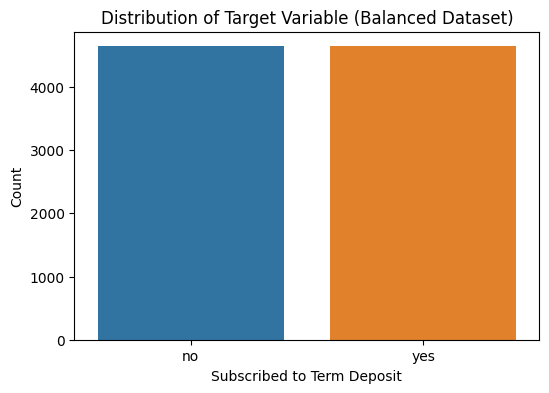

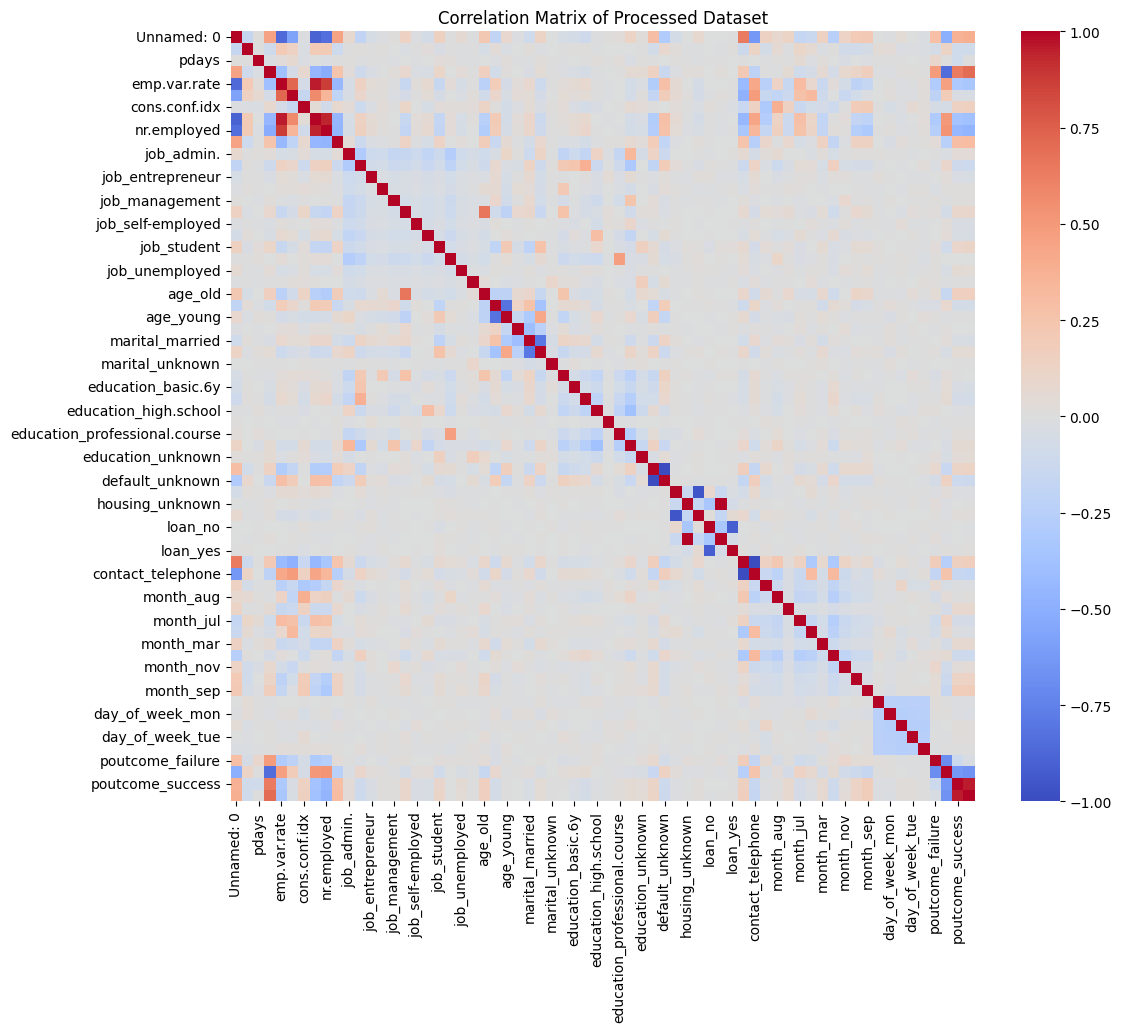

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=balanced_data)
plt.title('Distribution of Target Variable (Balanced Dataset)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 10))
sns.heatmap(processed_data.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Matrix of Processed Dataset')
plt.show()


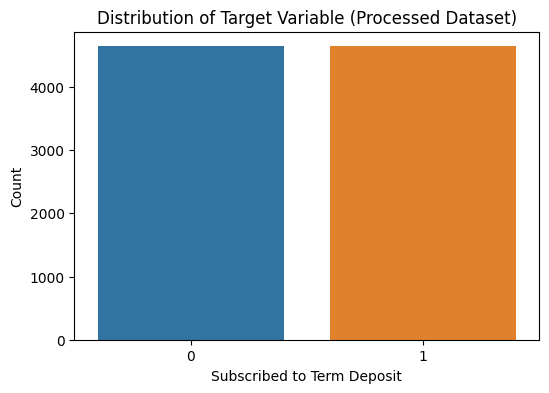

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=processed_data)
plt.title('Distribution of Target Variable (Processed Dataset)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

In [14]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'penalty': ['l2'] 
}

grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with Best Model:", accuracy)


Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy with Best Model: 0.7025862068965517


In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20, 30],   
    'min_samples_split': [2, 5, 10],   
    'min_samples_leaf': [1, 2, 4]       
}

grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
print("Best Hyperparameters for Random Forest:", best_params_rf)

best_model_rf = grid_search_rf.best_estimator_

y_pred_rf = best_model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Accuracy with Best Random Forest Model:", accuracy_rf)


Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy with Best Random Forest Model: 0.7467672413793104


In [16]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()


xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy with XGBoost Model (Default Hyperparameters):", accuracy_xgb)


Accuracy with XGBoost Model (Default Hyperparameters): 0.7354525862068966


In [17]:
from sklearn.ensemble import GradientBoostingClassifier

gbm_classifier = GradientBoostingClassifier()
gbm_classifier.fit(X_train, y_train)

y_pred_gbm = gbm_classifier.predict(X_test)

accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
print("Accuracy with Gradient Boosting Model:", accuracy_gbm)


Accuracy with Gradient Boosting Model: 0.7381465517241379


In [18]:
from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

nn_classifier.fit(X_train, y_train)

y_pred_nn = nn_classifier.predict(X_test)

# Calculate accuracy
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy with NN Model:", accuracy_nn)


Accuracy with NN Model: 0.6745689655172413
